In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
data = xr.open_dataset('/ocean/jtao/MOAD/analysis-jake/notebooks/Wastewater.nc')
data = data.drop(['time'])
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data = data.assign_coords(time=month)
extend_data = data.isel(time = slice(0, 3))
extend_data = extend_data.drop(['time'])
new_time_values = ['Jan2018', 'Feb2018', 'Mar2018']
extend_data = extend_data.assign_coords(time=new_time_values)
combined_data = xr.concat([data, extend_data], dim='time')
combined_data

<xarray.Dataset>
Dimensions:      (time: 15)
Coordinates:
  * time         (time) <U7 'Jan' 'Feb' 'Mar' ... 'Jan2018' 'Feb2018' 'Mar2018'
Data variables: (12/13)
    temp         (time) float32 11.62 12.04 12.4 14.52 ... 11.62 12.04 12.4
    ph           (time) float32 7.298 7.291 7.274 7.28 ... 7.298 7.291 7.274
    nh3          (time) float32 9.608 11.4 11.33 13.3 ... 11.03 9.608 11.4 11.33
    bod_calc     (time) float32 68.11 79.85 74.24 83.58 ... 68.11 79.85 74.24
    cl           (time) float32 91.85 101.0 74.68 82.93 ... 91.85 101.0 74.68
    cond         (time) float32 566.0 580.1 510.3 552.2 ... 566.0 580.1 510.3
    ...           ...
    do           (time) float32 8.836 7.723 7.523 6.7 ... 8.836 7.723 7.523
    no3          (time) float32 0.6298 0.4678 0.4695 ... 0.6298 0.4678 0.4695
    no2          (time) float32 0.05476 0.06329 0.06488 ... 0.06329 0.06488
    alkalinity   (time) float32 86.32 93.79 87.39 101.8 ... 86.32 93.79 87.39
    ss           (time) float32 50.41 51.01 50.61 51.5 ... 50.41 51.01 50.61
    vss          (time) float32 42.86 44.26 44.22 46.08 ... 42.86 44.26 44.22
Attributes:
    acknowledgements:      Based on Metro Data File
    creator_email:         sallen@eoas.ubc.ca
    creator_name:          UBC Salish Sea Project Contributors
    creator_url:           https://salishsea-meopar-docs.readthedocs.org/
    institution:           UBC EOAS
    institution_fullname:  Earth, Ocean & Atmospheric Sciences, University of...
    title:                 wastewater_20230917
    comment:               wastewater_20230917 on Monthly Time Coordinates
    notebook:              Wastewater_File.ipynb
    summary:               Wastewater, flux, area, and conservative temperature
    history:               [2023-10-10] File creation.

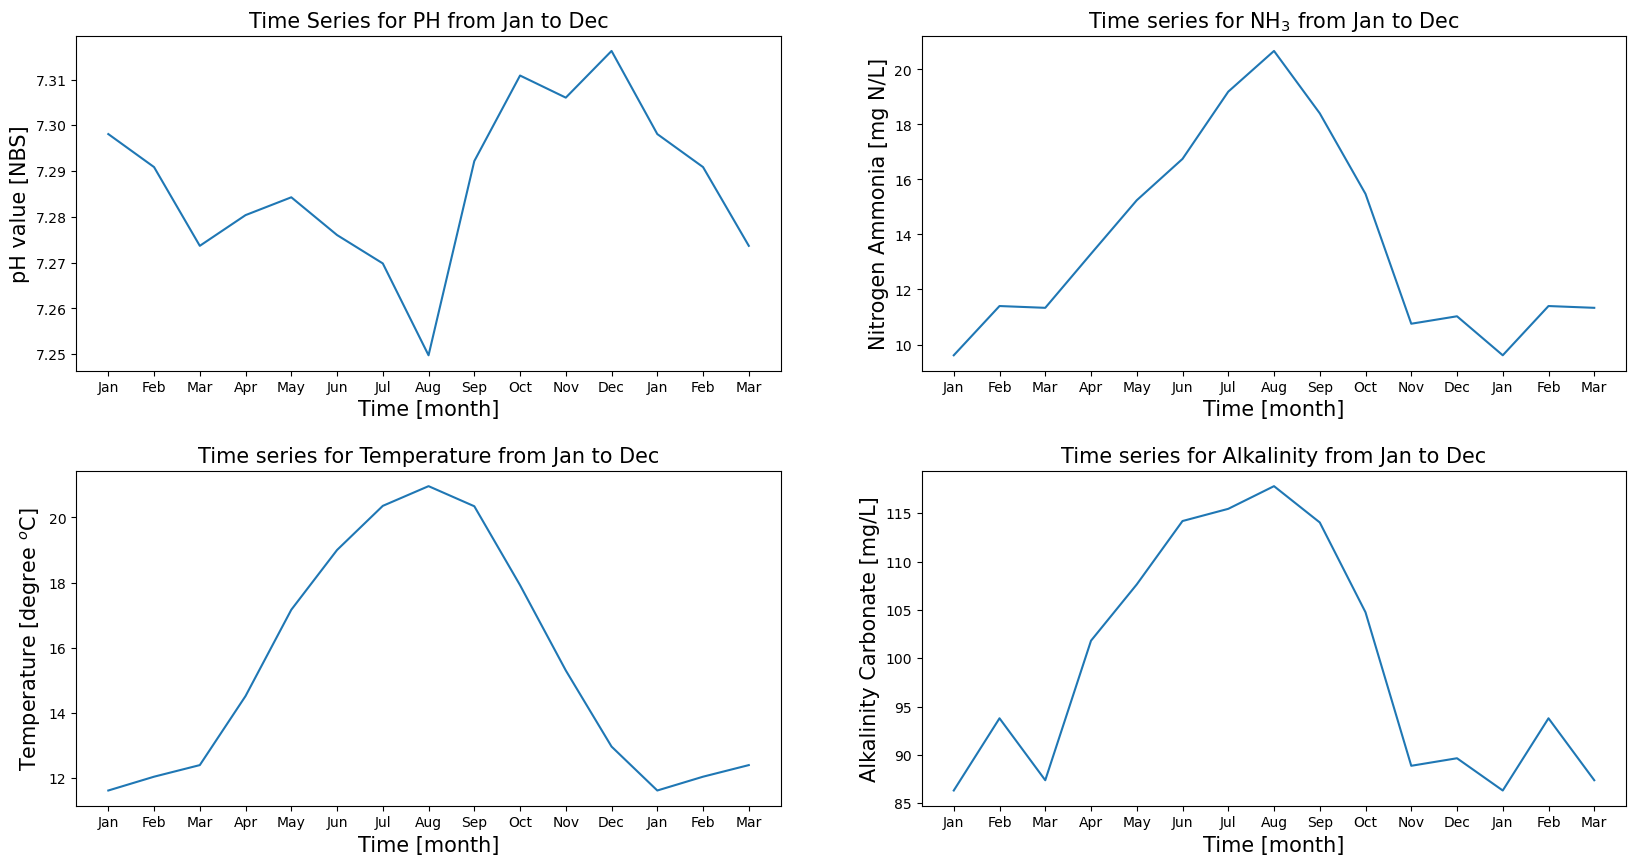

In [8]:
time_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
combined_data.ph.plot(ax = axs[0, 0], x = 'time')
axs[0, 0].set_title('Time Series for PH from Jan to Dec', fontsize=15)
axs[0, 0].set_xlabel('Time [month]', fontsize=15)
axs[0, 0].set_ylabel('pH value [NBS]', fontsize=15)
axs[0, 0].set_xticks(range(len(time_label)))
axs[0, 0].set_xticklabels(time_label)


combined_data.nh3.plot(ax = axs[0, 1], x = 'time')
axs[0, 1].set_title('Time series for NH$_3$ from Jan to Dec', fontsize=15)
axs[0, 1].set_xlabel('Time [month]', fontsize=15)
axs[0, 1].set_ylabel('Nitrogen Ammonia [mg N/L]', fontsize=15)
axs[0, 1].set_xticks(range(len(time_label)))
axs[0, 1].set_xticklabels(time_label)


combined_data.temp.plot(ax = axs[1, 0], x = 'time')
axs[1, 0].set_title('Time series for Temperature from Jan to Dec', fontsize=15)
axs[1, 0].set_xlabel('Time [month]', fontsize=15)
axs[1, 0].set_ylabel('Temperature [degree $^o$C]', fontsize=15)
axs[1, 0].set_xticks(range(len(time_label)))
axs[1, 0].set_xticklabels(time_label)


combined_data.alkalinity.plot(ax = axs[1, 1], x = 'time')
axs[1, 1].set_title('Time series for Alkalinity from Jan to Dec', fontsize=15)
axs[1, 1].set_xlabel('Time [month]', fontsize=15)
axs[1, 1].set_ylabel('Alkalinity Carbonate [mg/L]', fontsize=15)
axs[1, 1].set_xticks(range(len(time_label)))
axs[1, 1].set_xticklabels(time_label)


fig.subplots_adjust(hspace=0.3)